## Exploratory Data Analysis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Importing stuff for time series
import dateparser
import datetime

In [3]:
bank_full = pd.read_csv('bank-full.csv')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_full.groupby(['poutcome', 'y']).size()

poutcome  y  
failure   no      4283
          yes      618
other     no      1533
          yes      307
success   no       533
          yes      978
unknown   no     33573
          yes     3386
dtype: int64

I noticed that majority of the dataset belongs to the class `poutcome==unknown`. This is evident as 36,959 datapoints in the summary series above belong to the class `poutcome==unknown`, with 33,573 from `y==no` and `y==yes`. 

In [6]:
bank_full[bank_full['pdays'] == -1].groupby(['poutcome']).size()

poutcome
unknown    36954
dtype: int64

I also wanted to probe whether there is a link between not being contacted before, i.e. `pdays==-1` and having an `unknown` outcome from the previous marketing campaign, which is `poutcome==unknown`. From the series above it appears that for every person who was not contacted previously, their outcome from the previous marketing campaign was `unknown`. The series above essentially summarizes that the only values of `poutcome` for `pdays==-1` is `unknown`. 

In [7]:
bank_full.loc[bank_full['pdays'] == -1, 'previous'].unique()

array([0], dtype=int64)

Perhaps, it is also worth checking if there is a link between not being contacted previously, `pdays==-1` and the number of contacts performed in the previous marketing campaign `previous`. It turns out that not being contacted before automatically means that zero contacts were performed on the client in the previous marketing campaign. This is evident as the only value for `previous` when `pdays==-1` is 0. 

In [8]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df = bank_full.dropna()
df.shape

(45211, 17)

In [10]:
# defining a helper function that labels bars in a bar plot
def label_bars(bar_plot_):
    for bar_ in bar_plot_.patches:
        bar_plot_.annotate(format(bar_.get_height(), '.2f'), 
                   (bar_.get_x() + bar_.get_width() / 2, 
                    bar_.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
        
# defining a helper function that plots two kinds of barplots for two categorical variables

def bar_plot(df, xvar1, xvar2):
    pct1 = 100 * df.groupby([xvar1, xvar2]).size() / df.groupby([xvar1]).size()
    pct1 = pct1.reset_index()
    pct1.rename(columns = {0:'PCT'}, inplace = True)
    pct1['PCT'] = np.round(pct1['PCT'], 2)
    
    pct2 = 100 * df.groupby([xvar2, xvar1]).size() / df.groupby([xvar2]).size()
    pct2 = pct2.reset_index()
    pct2.rename(columns = {0:'PCT'}, inplace = True)
    pct2['PCT'] = np.round(pct2['PCT'], 2)
    
    fig, ax = plt.subplots(nrows=2, figsize=(6, 6))
    bar = sns.barplot(data = pct1, x = xvar1, y = 'PCT', hue = xvar2, ax=ax[0])
    bar.set_xlabel(xvar1.capitalize())
    bar.set_ylabel('Percentage subscribed')
    bar.set_title('Percentage that Subscribed to Term Deposit')
    labels = [item.get_text().capitalize() for item in ax[0].get_xticklabels()]
    ax[0].set_xticklabels(labels=labels)
    label_bars(bar_plot_ = bar)
    # for bar_ in bar.patches: 
      #  bar.annotate(format(bar_.get_height(), '.2f'), 
       #            (bar_.get_x() + bar_.get_width() / 2, 
        #            bar_.get_height()), ha='center', va='center',
         #          size=10, xytext=(0, 5),
          #         textcoords='offset points')
    ax[0].set_ylim((0, 100))
    
    bar1 = sns.barplot(data=pct2, x=xvar2, y='PCT', hue=xvar1, ax=ax[1])
    bar1.set_xlabel(xvar2.capitalize())
    bar1.set_ylabel('Percentage subscribed')
    bar1.set_title('Percentage that Subscribed to Term Deposit')
    labels = [item.get_text().capitalize() for item in ax[1].get_xticklabels()]
    ax[1].set_xticklabels(labels=labels)
    label_bars(bar_plot_ = bar1)
    # for bar_ in bar1.patches:
      #  bar1.annotate(format(bar_.get_height(), '.2f'), 
       #            (bar_.get_x() + bar_.get_width() / 2, 
        #            bar_.get_height()), ha='center', va='center',
         #          size=10, xytext=(0, 5),
          #         textcoords='offset points')
    ax[1].set_ylim((0, 100))
    ttl = bar1.title
    ttl.set_position([0.5, 1.05])
    fig.tight_layout()
    plt.show();
    

### What is the distribution of age?

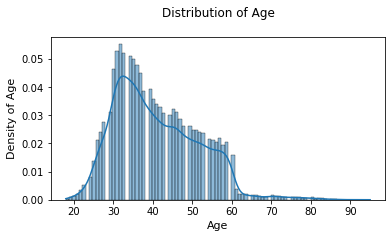

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
age_hist = sns.histplot(data=df, x='age', stat='density', kde=True)
age_hist.set_title('Distribution of Age', pad=20, size=12)
ax.set_xlabel('Age', size=11)
ax.set_ylabel('Density of Age', size=11)
plt.show();

Above, it appears that the distribution of age is slightly skewed to the right. This is evident from the longer tail on the right.

## Is there a difference in distribution of age based on target outcome?

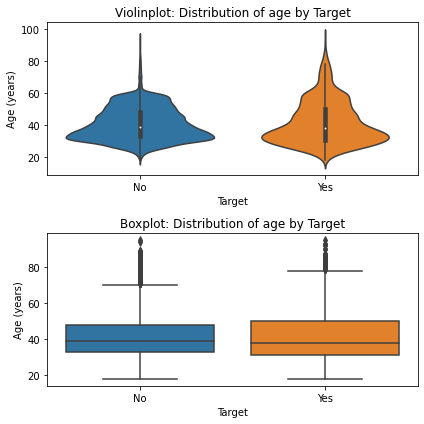

In [12]:
# target outcome tells us whether the client has subscribed for a long term deposit
fig, ax = plt.subplots(nrows = 2, figsize=(6,6))
violin = sns.violinplot(data=df, x='y', y='age', ax=ax[0])
violin.set_xlabel('Target')
violin.set_ylabel('Age (years)')
ax[0].set_title('Violinplot: Distribution of age by Target')
labels = [item.get_text().capitalize() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels = labels)

box = sns.boxplot(data=df, x='y', y='age', ax=ax[1])
box.set_xlabel('Target')
box.set_ylabel('Age (years)')
ax[1].set_title('Boxplot: Distribution of age by Target')
ax[1].set_xticklabels(labels=labels)

fig.tight_layout()
plt.show();

From the plots above, the distribution of age does not seem to vary significantly with the target outcome. The only difference I see is that the upper quartile or 75th percentile of age for `Target = yes` is greater than that for `Target = no`.

## Does marital status affect whether an individual subscribes for a term deposit?

In [13]:
pct = 100 * df.groupby(['y', 'marital']).size() / df.groupby(['marital']).size()
pct = pct.reset_index()
pct.rename(columns = {0:'PCT'}, inplace=True)
pct['PCT'] = np.round(pct['PCT'], 2)
print(pct)
print()
pct2 = 100 * df.groupby(['y', 'marital']).size() / df.groupby(['y']).size()
pct2 = pct2.reset_index()
pct2.rename(columns = {0:'PCT'}, inplace=True)
pct2['PCT'] = np.round(pct2['PCT'], 2)
print(pct2)

     y   marital    PCT
0   no  divorced  88.05
1   no   married  89.88
2   no    single  85.05
3  yes  divorced  11.95
4  yes   married  10.12
5  yes    single  14.95

     y   marital    PCT
0   no  divorced  11.48
1   no   married  61.27
2   no    single  27.25
3  yes  divorced  11.76
4  yes   married  52.09
5  yes    single  36.15


In the data table above, I tried to find the percentage splits for marital status in each value of `Target`. Essentially, I want to find out what percentage of individuals who subscribed to a term deposit (`Target = 'yes'`) are single, married, or divorced. I do the same for individuals who have not subscribed to a long term deposit. 

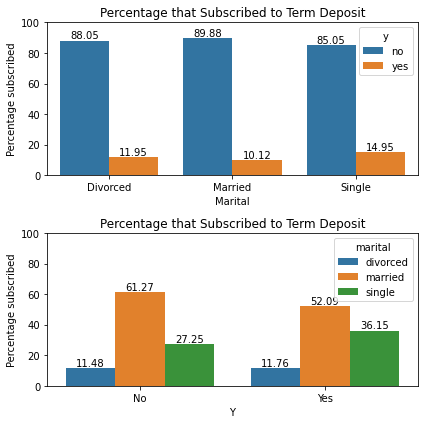

In [14]:
bar_plot(df, 'marital', 'y')

## Does education level affect whether an individual subscribes for a term deposit?

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
pct_education_1 = 100 * df.groupby(['y', 'education']).size() / df.groupby(['y']).size()
print(pct_education_1)
pct_education_2 = 100 * df.groupby(['education', 'y']).size() / df.groupby(['education']).size()
print(pct_education_2)

y    education
no   primary      15.680577
     secondary    51.981364
     tertiary     28.317720
     unknown       4.020340
yes  primary      11.174135
     secondary    46.322556
     tertiary     37.738703
     unknown       4.764606
dtype: float64
education  y  
primary    no     91.373522
           yes     8.626478
secondary  no     89.440565
           yes    10.559435
tertiary   no     84.993610
           yes    15.006390
unknown    no     86.429725
           yes    13.570275
dtype: float64


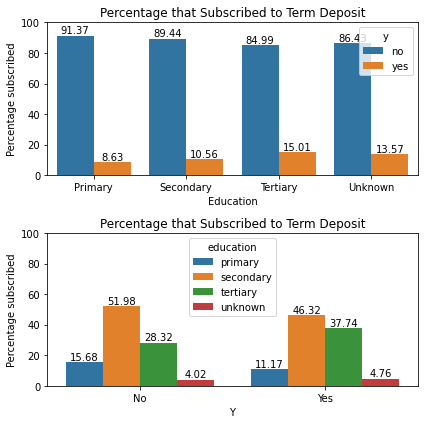

In [17]:
bar_plot(df=df, xvar1='education', xvar2='y')

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


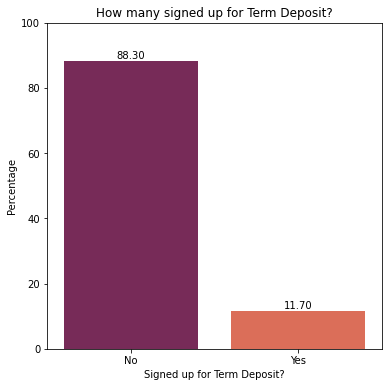

In [19]:
# What is the split of yes vs no?
y_pct = 100 * df.groupby(['y']).size() / df.groupby(['y']).size().sum()
y_pct = y_pct.reset_index()
y_pct.rename(columns = {0:'PCT'}, inplace=True)
y_pct['PCT'] = np.round(y_pct['PCT'], 2)
y_pct

fig, ax = plt.subplots(figsize = (6, 6))
y_plot = sns.barplot(data = y_pct, x = 'y', y = 'PCT', palette = 'rocket')
y_plot.set_xlabel('Signed up for Term Deposit?')
y_plot.set_ylabel('Percentage')
y_plot.set_title('How many signed up for Term Deposit?')
labels = [label.get_text().capitalize() for label in ax.get_xticklabels()]
ax.set_xticklabels(labels = labels)
y_plot.set_ylim((0, 100))
label_bars(bar_plot_ = y_plot);

This bar graph makes it very obvious that our dataset is highly imbalanced as 88.30% of the data belongs to the class `no` while only 11.70% of the data belongs to the class `yes`. We will have to use some undersampling or oversampling techniques that can help take into account the imbalanced nature of the dataset.

## Does having credit in default affect whether an individual subscribes to a term deposit?

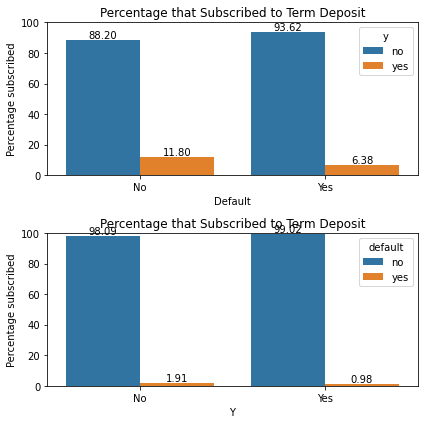

In [20]:
bar_plot(df, xvar1='default', xvar2='y');

## Does the outcome of the previous marketing campaign affect whether an individual subscribes to a term deposit?

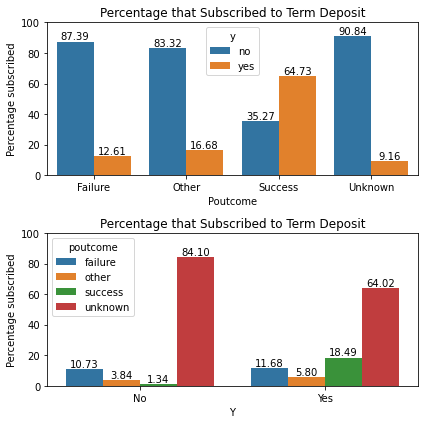

In [21]:
bar_plot(df, xvar1='poutcome', xvar2='y');

## Does housing loan affect whether an individual subscribes to a term deposit?

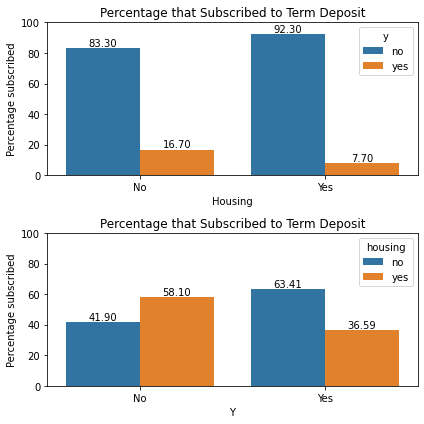

In [22]:
bar_plot(df, xvar1='housing', xvar2='y');

## Does a personal loan affect whether an individual subscribes to a term deposit?

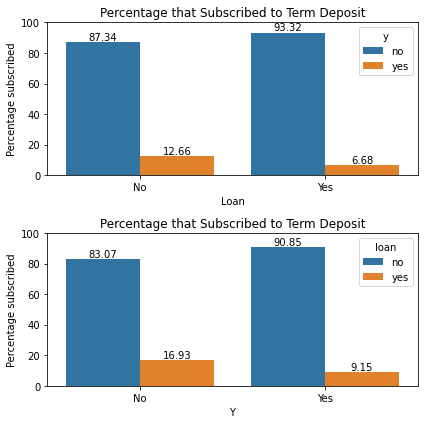

In [23]:
bar_plot(df, xvar1='loan', xvar2='y');

## Does method of contact affect whether an individual subscribes to a term deposit?

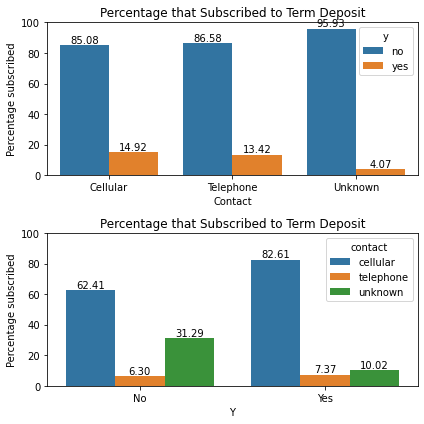

In [24]:
bar_plot(df, xvar1='contact', xvar2='y');

## Does the number of days that passed by after the client was last contacted affect whether the client subscribes for a term deposit? Does pdays affect target y? 

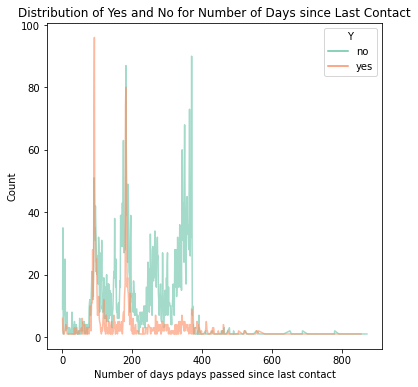

In [25]:
pday_summary = df.groupby(['pdays', 'y']).size()
pday_summary = pday_summary.reset_index()
pday_summary.rename(columns={0:'Count'}, inplace=True)

pday_summary1 = pday_summary[pday_summary['pdays'] != -1]
fig, ax = plt.subplots(figsize=(6, 6))
pday_lineplot = sns.lineplot(data = pday_summary1, x='pdays', y='Count', hue='y', palette = 'Set2', alpha=0.6)
pday_lineplot.set_xlabel('Number of days pdays passed since last contact')
pday_lineplot.set_title('Distribution of Yes and No for Number of Days since Last Contact')
pday_lineplot.legend(title = 'Y');

## Does the number of contacts during this campaign affect the number of term subscriptions?

   Campaign    y  Count
0         1   no  14983
1         1  yes   2561
2         2   no  11104
3         2  yes   1401
4         3   no   4903


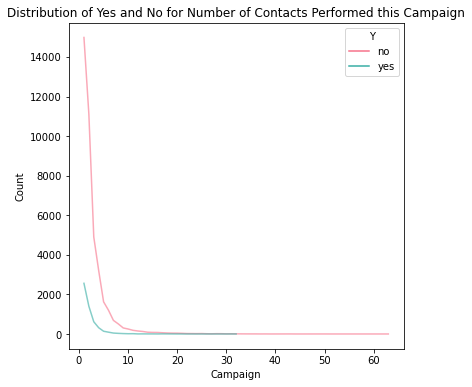

In [26]:
campaign_summary = df.groupby(['campaign', 'y']).size()
campaign_summary = campaign_summary.reset_index()
campaign_summary.rename(columns = {'campaign': 'Campaign', 0:'Count'}, inplace=True)

print(campaign_summary.head())

fig, ax = plt.subplots(figsize=(6, 6))
campaign_lineplot = sns.lineplot(data=campaign_summary, x='Campaign', y='Count', hue='y', palette='husl', alpha=0.6)
campaign_lineplot.legend(title='Y')
campaign_lineplot.set_title('Distribution of Yes and No for Number of Contacts Performed this Campaign');



## Does the number of contacts before this marketing campaign affect the number of term subscriptions?

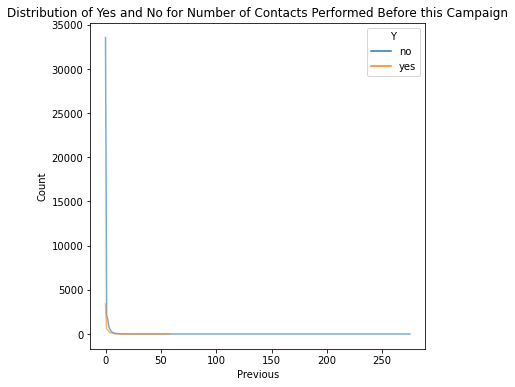

In [29]:
previous_summary = df.groupby(['previous', 'y']).size()
previous_summary = previous_summary.reset_index()
previous_summary.rename(columns = {'previous':'Previous', 0:'Count'}, inplace=True)

fig, ax = plt.subplots(figsize=(6, 6))
previous_lineplot = sns.lineplot(data=previous_summary, x='Previous', y='Count', hue='y', alpha=0.6)
previous_lineplot.legend(title='Y')
previous_lineplot.set_title('Distribution of Yes and No for Number of Contacts Performed Before this Campaign');

## Any correlation between the number of contacts performed this campaign and the number of contacts performed the previous campaign?

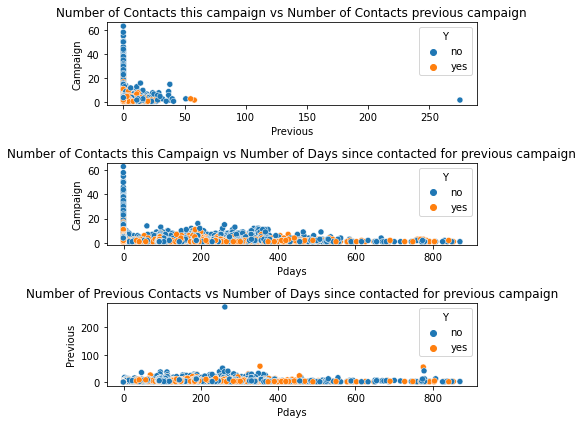

In [30]:
fig, ax = plt.subplots(nrows=3, figsize=(6, 6))
sns.scatterplot(data=df, x='previous', y='campaign', hue='y', ax=ax[0])
ax[0].set_xlabel('Previous')
ax[0].set_ylabel('Campaign')
ax[0].set_title('Number of Contacts this campaign vs Number of Contacts previous campaign')
ax[0].legend(title='Y');

sns.scatterplot(data=df, x='pdays', y='campaign', hue='y', ax=ax[1])
ax[1].set_xlabel('Pdays')
ax[1].set_ylabel('Campaign')
ax[1].set_title('Number of Contacts this Campaign vs Number of Days since contacted for previous campaign')
ax[1].legend(title='Y')


sns.scatterplot(data=df, x='pdays', y='previous', hue='y', ax=ax[2])
ax[2].set_xlabel('Pdays')
ax[2].set_ylabel('Previous')
ax[2].set_title('Number of Previous Contacts vs Number of Days since contacted for previous campaign')
ax[2].legend(title='Y')
fig.tight_layout();

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df['date'] = df['day'].astype('str') + ' ' + df['month']
df['date']

0         5 may
1         5 may
2         5 may
3         5 may
4         5 may
          ...  
45206    17 nov
45207    17 nov
45208    17 nov
45209    17 nov
45210    17 nov
Name: date, Length: 45211, dtype: object

In [14]:
df['date'] = df['date'].apply(dateparser.parse)

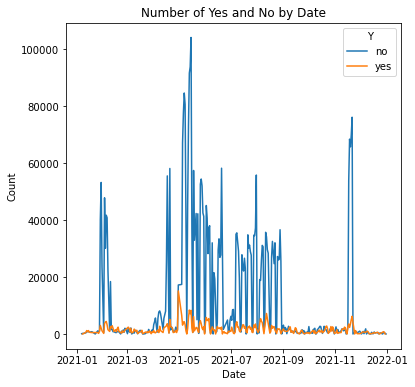

In [34]:
time_series = 100 * df.groupby(['date', 'y']).size() 
time_series = time_series.reset_index()
time_series.rename(columns = {0:'Count'}, inplace=True)

fig, ax = plt.subplots(figsize=(6, 6))
time_series_plot = sns.lineplot(data=time_series, x='date', y='Count', hue='y')
ax.set_title('Number of Yes and No by Date')
ax.set_xlabel('Date')
ax.legend(title='Y');

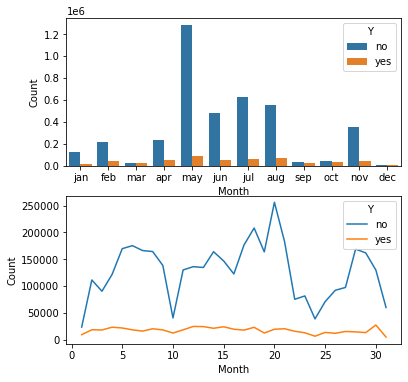

In [35]:
time_series_month = 100 * df.groupby(['month', 'y']).size() 
time_series_month = time_series_month.reset_index()
time_series_month.rename(columns = {0:'Count'}, inplace=True)

months=np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 
       'sep', 'oct', 'nov', 'dec'])
month_index = []
for month in time_series_month['month']:
    month_index.append(list(np.where(month==months)[0])[0])

time_series_month['month_index'] = np.array(month_index)
time_series_month.sort_values('month_index', inplace=True)

time_series_day = 100 * df.groupby(['day', 'y']).size() 
time_series_day = time_series_day.reset_index()
time_series_day.rename(columns = {0:'Count'}, inplace=True)

fig, ax = plt.subplots(nrows=2, figsize=(6, 6))
month_plot = sns.barplot(data=time_series_month, x='month', y='Count', hue='y', palette='tab10', ax=ax[0])
month_plot.set_xlabel('Month')
month_plot.set_ylabel('Count')
month_plot.legend(title='Y');

day_plot = sns.lineplot(data=time_series_day, x='day', y='Count', hue='y', ax=ax[1])
day_plot.set_xlabel('Month')
day_plot.set_ylabel('Count')
day_plot.legend(title='Y');

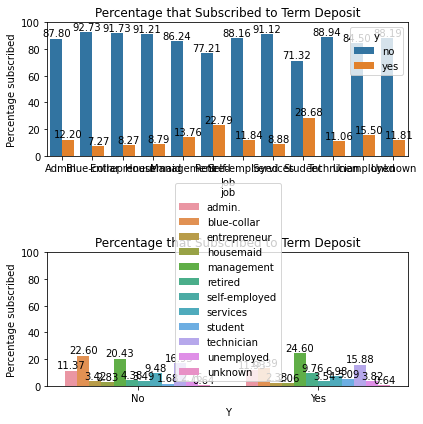

In [36]:
bar_plot(df, 'job', 'y');

## Model Fitting

We have found that our data is highly imbalanced because we have an overwhelmingly large representation of 'No' in our target variable `y` as compared to the category `Yes`. For our models to work accurately, we will have to try undersampling. I think model-fitting will be much easier if we split the dataset into two parts. In our EDA section we noticed that an overwhelming majority, about 37000, of our datapoints had the value `pdays==-1`. Hence, I split the dataset into two parts.
- All data points where `pdays==-1`.
- Rest of the data, i.e. where `pdays >= 0`


### pdays == -1

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2021-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2021-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2021-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2021-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2021-05-05


In [20]:
# drop unnecessary columns
df_mf = df.drop(columns = ['duration', 'date'])

# filter out where pdays==-1
df_mf = df_mf[df_mf['pdays'] == -1]
df_mf.shape

(36954, 16)

In [21]:
# since pdays == -1 means that poutcome == unknown we can get rid of both these variables
df_mf.drop(columns=['pdays', 'poutcome'], inplace=True)

In [22]:
df_mf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,no


In [23]:
X = df_mf.drop(columns=['y'])
y = df_mf['y'].values
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0


In [24]:
# standard preprocessing imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# apply StandardScaler() to all numeric variables
# use OneHotEncoder() to represent categorical variables
ct = ColumnTransformer([('scaling', StandardScaler(), ['age', 'balance', 'day', 'campaign', 'previous']), 
                       ('onehot', OneHotEncoder(sparse=False), ['job', 'marital', 'education', 'default', 
                                                               'housing', 'loan', 'contact', 'month'])])
X_trans = ct.fit_transform(X)
y = y.reshape(-1, 1)
ohe =  OneHotEncoder(sparse=False)

# use OneHotEncoder() to represent target variable as a categorical variable
y_trans = ohe.fit_transform(y)[:, 1]
y_trans

array([0., 0., 0., ..., 1., 1., 0.])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, random_state=1, train_size=0.90, test_size=0.10)

In [26]:
X_train.shape

(33258, 45)

### Using Gaussian NaiveBayes

In [27]:
import imblearn # import imblearn library

In [28]:
from imblearn.under_sampling import NearMiss

# we want to resample our data to reduce the imbalance
undersample = NearMiss(version=2, n_neighbors=5)
X_train1, y_train1 = undersample.fit_resample(X_train, y_train)

In the code chunk above, I essentially use the `NearMiss-2` algorithm which is an undersampling technique from Python's `imblearn` library. This algorithm essentially chooses points from the majority class with the minimum mean distance to the three furthest datapoints from the minority class. Using this technique, I transform the training data so as to reduce the imbalance in my data. 

In [29]:
X_train1.shape

(6080, 45)

From the output above it definitely looks like some data points have been taken out as we now only have 6080 data points as compared to 33258 data points from before.

In [30]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train1, y_train1)
gaussian_nb.score(X_test, y_test)

0.7987012987012987

Our Gaussian Naive Bayes algorithm gave us an accuracy of 79.87%. We can definitely aim for better!

In [31]:
GaussianNB().fit(X_train, y_train).score(X_test, y_test)

0.8676948051948052

Note that applying the Naive Bayes algorithm on the imbalanced dataset gives us a very high accuracy. However this is not an accurate measure of the accuracy. About 88% of our dataset belongs to the class `no` so fitting our model to this imbalanced dataset could mean that our model blindly predicts a `no` everyime. Since about 85-88% of the test data belongs to the class `no`, we will get a similar accuracy since our model blindly predicts a `no`, hence being wrong only 15% of the time. Therefore, the accuracy of 86.77% is definitely not a real representation of our model. To obtain higher accuracies we try other algorithms.

### Using KNN

In [32]:
from imblearn.under_sampling import OneSidedSelection

# we use the OneSidedSelection algorithm to improve imbalance
undersample = OneSidedSelection(n_neighbors=3, n_seeds_S=200)
X_train_KNN, y_train_KNN = undersample.fit_resample(X_train, y_train)

We are now trying to use KNN (K Nearest Neighbors) classification algorithm. The `OneSidedSelection` algorithm or `OSS` for sure combines `Tomek Links` and the `Condensed Nearest Neighbor (CNN)` rule. I thought the `OSS` algorithm would be most appropriate to use with the KNN algorithm because it gives the highest accuracy as compared to other undersampling algorithms.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_KNN, y_train_KNN).score(X_test, y_test)

0.9063852813852814

After applying the OSS algorithm, our `KNeighborsClassifier` gives us an accuracy of 90.64% which is very high. However, we must also look at the confusion matrix to get an idea about the precision and recall. 

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_pred_KNN = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_KNN))
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred_KNN)))

[[3302   50]
 [ 296   48]]
f1 score: 0.22


In the confusion matrix above we see that about 296 points belonging to the class `no` are misclassified by our algorithm as `yes`. This is reflected in the relatively poor f1 score of 0.22. Let's see the range of f1 scores that we obtain.

In [36]:
# grid_search.fit(X_train_KNN, y_train_KNN)
# performed gridsearch but takes too long to run so have not included in notebook

In [37]:
KNeighborsClassifier(n_neighbors=18).fit(X_train_KNN, y_train_KNN).score(X_test, y_test)

0.9071969696969697

Since, the `OneSidedSelection` undersampling algorithm gives us great results for KNN, I thought to try the Gaussian Naive Bayes model on this training data to see whether performance improves. The performance does seem to have improved as the accuracy increases to about 86%.

In [39]:
gaussian_nb.fit(X_train_KNN, y_train_KNN).score(X_test, y_test)

0.8690476190476191

### Using Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train_KNN, y_train_KNN)
logistic_regression.score(X_test, y_test)

0.9082792207792207

We fit our model to the data that we transformed using the `OSS algorithm`. Again, we notice that we obtain a very high accuracy of 90.85%. However, we must have a look at the precision-recall score or the confusion matrix to get a better idea of the precision.

In [148]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_regression.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3329,   23],
       [ 315,   29]], dtype=int64)

<AxesSubplot:>

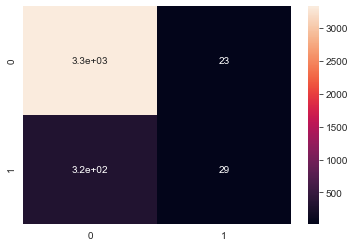

In [149]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [153]:
from sklearn.metrics import f1_score
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred)))

f1 score: 0.15


The f1 score above is very poor. Instead of using the undersampling algorithms, it might be time to use cost senstive learning to see if we can improve the precision and recall. Below we rely on automatic weights that are assigned to the classes `no` and `yes` using the keyword argument `class_weight = balanced`.

In [151]:
logit_reg_cs = LogisticRegression(max_iter=10000, class_weight='balanced')
logit_reg_cs.fit(X_train, y_train)
print('Accuracy: {:.2f}'.format(logit_reg_cs.score(X_test, y_test)))
y_pred_logit_reg = logit_reg_cs.predict(X_test)

print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred_logit_reg)))
print('weighted f1 score: {:.2f}'.format(f1_score(y_test, y_pred_logit_reg, average='weighted')))

Accuracy: 0.71
f1 score: 0.30
weighted f1 score: 0.77


Our accuracy has dropped dramatically to only 71% but our f1 score has doubled from 0.15 to 0.30. This is a good sign. Perhaps, we can assign manual class weights and tune these weights for the highest f1 score or accuracy. The confusion matrix below definitely reflects the loss of accuracy as the number of misclassifications have increased.

In [152]:
confusion_matrix(y_test, y_pred_logit_reg)

array([[2395,  957],
       [ 117,  227]], dtype=int64)

In the code block below we use a GridSearchCV to fine tune the class weights. We optimize for the weighted f1 score, i.e. we want the class weights that return to us the highest weighted f1 score.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\aksha\.anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aksha\.anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

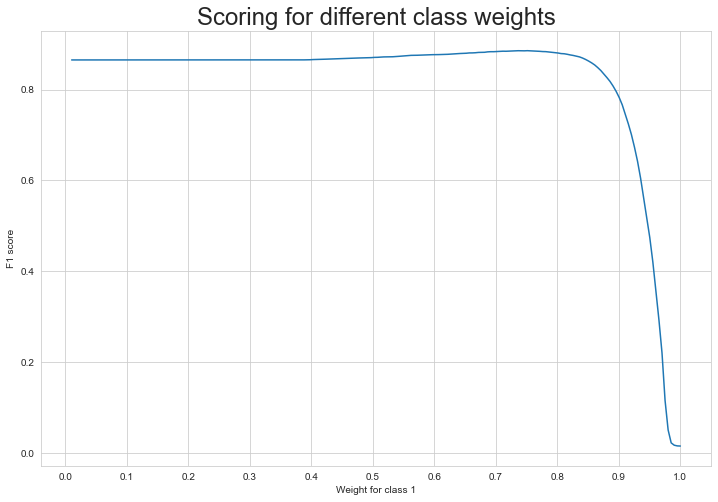

In [61]:
# fine-tuning class weights
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression()

# setting up weights
weights = np.linspace(0, 0.99, 200)

# parameter grid
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# running grid search
gridsearch = GridSearchCV(estimator=lr, param_grid = param_grid, 
                         cv = StratifiedKFold(), n_jobs = -1, 
                         scoring = 'f1_weighted', verbose=2).fit(X_train, y_train)


#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [62]:
gridsearch.best_params_

{'class_weight': {0: 0.24874371859296482, 1: 0.7512562814070352}}

The optimal class weights are given below. The model can simply be extracted from `gridsearch.best_estimator_`. Let us see how this model has performed.

In [68]:
lr_best = gridsearch.best_estimator_
lr_best.fit(X_train, y_train)
y_pred_lr_best = lr_best.predict(X_test)
print('Accuracy score is: {:.2f}'.format(lr_best.score(X_test, y_test)))
print('f1 score is: {:.2f}'.format(f1_score(y_test, y_pred_lr_best)))
print('Weighted-f1 score is: {:.2f}'.format(f1_score(y_test, y_pred_lr_best, average='weighted')))

Accuracy score is: 0.91
f1 score is: 0.34
Weighted-f1 score is: 0.90


C:\Users\aksha\.anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fine tuning, using GridSearchCV, has definitely helped. Notice that our accuracy is now at 91% and our f1 score is much higher at 0.34 as compared to only 0.15 before. 

[[3277   75]
 [ 257   87]]


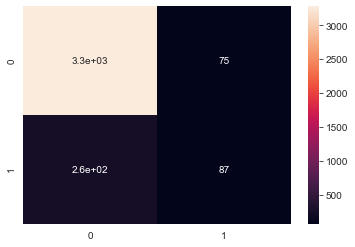

In [72]:
print(confusion_matrix(y_test, y_pred_lr_best))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_best), annot=True);

It appears like we might have shortlisted this logistic regression model!

### Using SVM

In [69]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(max_iter=1e6)
linear_svc.fit(X_train_KNN, y_train_KNN)

LinearSVC(max_iter=1000000.0)

In [73]:
linear_svc.score(X_test, y_test)

0.9077380952380952

In [76]:
y_pred_lsvc = linear_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred_lsvc))
print('f1-score: {:.2f}'.format(f1_score(y_test, y_pred_lsvc)))
print('Weighted f1-score: {:.2f}'.format(f1_score(y_test, y_pred_lsvc, average='weighted')))

[[3338   14]
 [ 327   17]]
f1-score: 0.09
Weighted f1-score: 0.87


In [78]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_KNN, y_train_KNN)
svc.score(X_test, y_test)

0.9096320346320347

In [79]:
y_pred_svc = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred_svc))
print('f1-score: {:.2f}'.format(f1_score(y_test, y_pred_svc)))
print('Weighted f1-score: {:.2f}'.format(f1_score(y_test, y_pred_svc, average='weighted')))

[[3339   13]
 [ 321   23]]
f1-score: 0.12
Weighted f1-score: 0.87


Both the linear support vector classificer (`LinearSVC`) and the kernelized support vector classifier (`SVC`) give us very high accuracies but they provide a very low f1-score of only 0.12. Performing a GridSearchCV to optimize f1 score on `SVC` is very computationally inefficient and time-consuming. Hence, I move onto looking at other algorithms. Note, however, that both these models have been applied to data undersampled through the `OSS` method. 

### Using Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
RFR = RandomForestClassifier(n_estimators = 100).fit(X_train_KNN, y_train_KNN)
RFR.score(X_test, y_test)

0.9109848484848485

In [158]:
print('f1 score: {:.2f}'.format(f1_score(y_test, RFR.predict(X_test))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test, RFR.predict(X_test), average='weighted')))

f1 score: 0.27
Weighted f1 score: 0.89


We fit the `RandomForestClassifier` on the `OSS` undersampled data and we get a very high accuracy of 91% but again we must look at our f1-score. Considering the lowest value of 0.15, an f1-score of 0.27 as obtained above is not too poor but we can strive for better. Hence, below we use cost-sensitive learning, with the weights assigned automatically using the `class_weight=balanced` argument.

In [81]:
RFC_balanced = RandomForestClassifier(n_estimators=10, class_weight='balanced')
print(RFC_balanced.fit(X_train, y_train).score(X_test, y_test))
y_pred_RFC = RFC_balanced.predict(X_test)
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred_RFC)))
print('weighted f1 score: {:.2f}'.format(f1_score(y_test, y_pred_RFC, average='weighted')))

0.908008658008658
f1 score: 0.17
weighted f1 score: 0.88


Our cost-sensitive learning has given a good accuracy of 90.80% but the f1-score is relatively worse. We now try and fine tune our class weights using `GridSearchCV`. 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\aksha\.anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

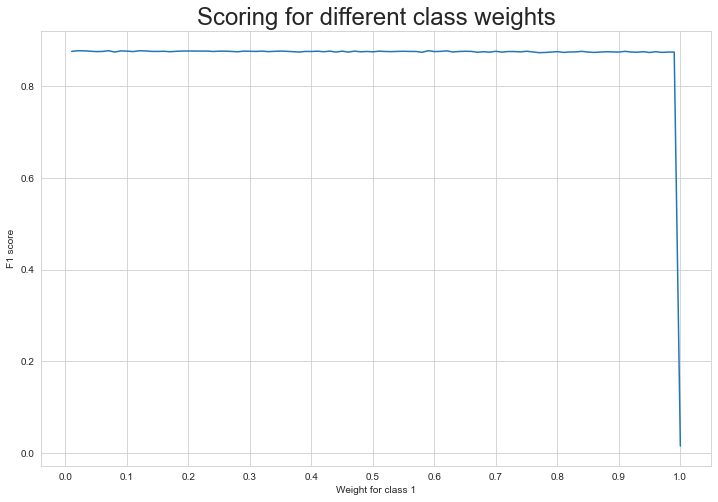

In [83]:
# setting up weights
weights = np.linspace(0, 0.99, 100)

# parameter grid
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# running grid search
gridsearch = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10), param_grid = param_grid, 
                         cv = StratifiedKFold(), n_jobs = -1, 
                         scoring = 'f1_weighted', verbose=2).fit(X_train, y_train)


#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [84]:
print(gridsearch.best_params_)
RFC_best = gridsearch.best_estimator_
print('Accuracy score: {:.2f}'.format(RFC_best.fit(X_train, y_train).score(X_test, y_test)))
y_pred_rfc_best = RFC_best.predict(X_test)
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred_rfc_best)))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test, y_pred_rfc_best, average='weighted')))

{'class_weight': {0: 0.41000000000000003, 1: 0.59}}
Accuracy score: 0.91
f1 score: 0.22
Weighted f1 score: 0.89


In [85]:
print(confusion_matrix(y_test, y_pred_rfc_best))

[[3322   30]
 [ 297   47]]


<AxesSubplot:>

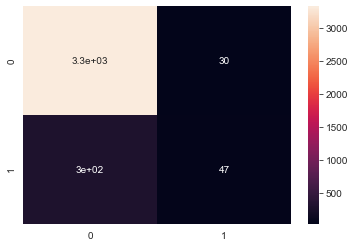

In [86]:
sns.heatmap(confusion_matrix(y_test, y_pred_rfc_best), annot=True)

After manually tuning our class weights, we arrived at an accuracy of 91%. However, the f1-score is only 0.21, which is not too great.

### Using Gradient Boost

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train_KNN, y_train_KNN)
GBC.score(X_test, y_test)

0.9120670995670995

### Using an ensemble of methods

In [88]:
from sklearn.ensemble import StackingClassifier
estimators = [('KNN', KNeighborsClassifier(n_neighbors=18))]
classifier = StackingClassifier(estimators=estimators, final_estimator=SVC())

In [89]:
classifier.fit(X_train_KNN, y_train_KNN).score(X_test, y_test)

0.9069264069264069

In [90]:
estimators = [('Logistic Regression', lr_best)]
classifier = StackingClassifier(estimators=estimators, final_estimator=RFC_best)

In [91]:
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

C:\Users\aksha\.anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aksha\.anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8601190476190477

In [92]:
y_pred_ensemble = classifier.predict(X_test)
print(confusion_matrix(y_pred_ensemble, y_test))

[[3129  294]
 [ 223   50]]


It does not appear that creating an ensemble of methods helps improve accuracy. To choose our model, I will rely on two metrics.
- accuracy
- f1-score
Using a combination of these two metrics, I think for `pdays==-1`, the logistic regression estimator `lr_best` does the best job because it has an accuracy of 91% with an f1-score of 0.34. An f1-score of 0.34 for an imbalanced dataset like this one is the best we can get.

## pdays != -1

In [52]:
df_mf1 = df.drop(columns = ['duration', 'date'])
df_mf1 = df_mf1[df_mf1['pdays'] != -1]
df_mf1.shape

(8257, 16)

In [53]:
df_mf1.groupby(['y']).size() / df_mf1.shape[0]

y
no     0.769287
yes    0.230713
dtype: float64

Note that our data for `pdays != -1`, i.e. cases where the customer was contacted previously, is also quite imbalanced. This is evident in the distribution of `yes` and `no` in the target variable `y`. About 76.9% of the data belongs to the class `no`, whereas 23.07% of the data belongs to the class `yes`. 

In [54]:
X_1 = df_mf1.drop(columns = ['y'])
y_1 = df_mf1['y'].values

In [55]:
X_1.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,1,151,3,failure
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,1,166,1,other
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,1,91,4,failure
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,1,86,4,other
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,1,143,3,failure


Now that we have our X and y arrays, we must apply the appropriate transformations and preprocessing methods before we fit our ML models.

In [56]:
ct2 = ColumnTransformer([('scaling', StandardScaler(), ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']), 
                       ('onehot', OneHotEncoder(sparse=False), ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                                                               'contact', 'month', 'poutcome'])])
X_1_trans = ct2.fit_transform(X_1)
X_1_trans

array([[-0.69614764, -0.22051966,  0.84746159, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0916338 , -0.58942474,  0.84746159, ...,  1.        ,
         0.        ,  0.        ],
       [-0.69614764,  0.61662366,  0.84746159, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.80510321,  0.42253189,  0.34232793, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.71757194,  1.35868162,  0.34232793, ...,  0.        ,
         1.        ,  0.        ],
       [-0.34602255,  0.4620691 ,  0.34232793, ...,  1.        ,
         0.        ,  0.        ]])

In [57]:
ohe = OneHotEncoder(sparse=False)
y_1_trans = ohe.fit_transform(y_1.reshape(-1, 1))[:, 1]

In [58]:
y_1_trans

array([0., 1., 1., ..., 1., 1., 0.])

In [59]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1_trans, y_1_trans, random_state=1)

### Using Gaussian Naive Bayes

In [60]:
undersample = NearMiss(version=3, n_neighbors=10)
X_train_NM, y_train_NM = undersample.fit_resample(X_train_1, y_train_1)

In [61]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_NM, y_train_NM)
gaussian_nb.score(X_test_1, y_test_1)

0.7869249394673123

Maybe we can try a `OneSidedSelection` algorithm as our approach to undersampling. 

In [62]:
undersample = OneSidedSelection(n_neighbors=5, n_seeds_S=200)
X_train_OSS, y_train_OSS = undersample.fit_resample(X_train_1, y_train_1)

In [63]:
gaussian_nb.fit(X_train_OSS, y_train_OSS).score(X_test_1, y_test_1)

0.7699757869249395

It appears that the `OneSidedSelection` approach does not help a lot in increasing the accuracy of the Gaussian Naive Bayes model. Perhaps we can try other models such as KNN.

### Using KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_OSS, y_train_OSS).score(X_test_1, y_test_1)

0.8290556900726392

In [65]:
y_pred_knn = knn.predict(X_test_1)
print(confusion_matrix(y_test_1, y_pred_knn))

[[1518  107]
 [ 246  194]]


### Using logistic regression

In [66]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train_OSS, y_train_OSS).score(X_test_1, y_test_1)

0.8426150121065376

In [67]:
print('f1 score: {:.2f}'.format(f1_score(y_test_1, logistic_regression.predict(X_test_1))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test_1, logistic_regression.predict(X_test_1), average='weighted')))

f1 score: 0.58
Weighted f1 score: 0.83


In [68]:
# trying weights
lr_weights = LogisticRegression(max_iter=10000, class_weight = 'balanced')
lr_weights.fit(X_train_1, y_train_1)
lr_weights.score(X_test_1, y_test_1)

0.7932203389830509

In [69]:
print(confusion_matrix(y_test_1, lr_weights.predict(X_test_1)))
print('f1 score: {:.2f}'.format(f1_score(y_test_1, lr_weights.predict(X_test_1))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test_1, lr_weights.predict(X_test_1), average='weighted')))

[[1323  302]
 [ 125  315]]
f1 score: 0.60
Weighted f1 score: 0.80


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\aksha\.anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

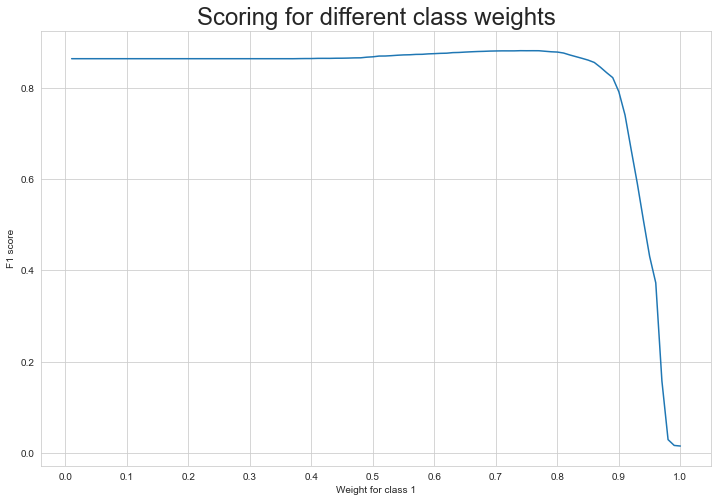

In [73]:
# using gridsearch cv to find optimal class weights.
# setting up weights
weights = np.linspace(0, 0.99, 100)

# parameter grid
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# running grid search
gridsearch = GridSearchCV(estimator=LogisticRegression(), param_grid = param_grid, 
                         cv = StratifiedKFold(), n_jobs = -1, 
                         scoring = 'f1_weighted', verbose=2).fit(X_train, y_train)


#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [74]:
print(gridsearch.best_params_)
lr_best_weights = gridsearch.best_estimator_
lr_best_weights.fit(X_train_1, y_train_1).score(X_test_1, y_test_1)

{'class_weight': {0: 0.26, 1: 0.74}}


0.8

In [75]:
print('best f1-score: {:.2f}'.format(f1_score(y_test_1, lr_best_weights.predict(X_test_1))))

best f1-score: 0.60


### Using SVM

In [79]:
svc = SVC()
svc.fit(X_train_OSS, y_train_OSS).score(X_test_1, y_test_1)

0.8397094430992736

In [80]:
print('f1 score: {:.2f}'.format(f1_score(y_test_1, svc.predict(X_test_1))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test_1, svc.predict(X_test_1), average='weighted')))

f1 score: 0.58
Weighted f1 score: 0.83


### Using Random Forest Classifier

In [83]:
RFR = RandomForestClassifier(n_estimators = 100).fit(X_train_OSS, y_train_OSS)
RFR.score(X_test_1, y_test_1)

0.8411622276029056

In [84]:
print('f1 score: {:.2f}'.format(f1_score(y_test_1, RFR.predict(X_test_1))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test_1, RFR.predict(X_test_1), average='weighted')))

f1 score: 0.60
Weighted f1 score: 0.84


In [85]:
X_test_1.shape

(2065, 50)

In [86]:
RFC_balanced = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
print('Accuracy: {:.2f}'.format(RFC_balanced.fit(X_train_1, y_train_1).score(X_test_1, y_test_1)))
print('f1 score: {:.2f}'.format(f1_score(y_test_1, RFC_balanced.predict(X_test_1))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test_1, RFC_balanced.predict(X_test_1), average='weighted')))

Accuracy: 0.85
f1 score: 0.57
Weighted f1 score: 0.83


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\aksha\.anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

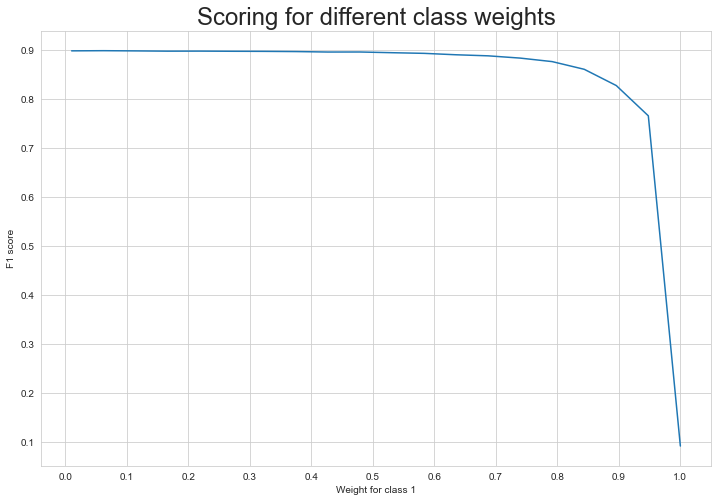

In [87]:
# we want to try and optimize accuracy based on class weights
# using gridsearch cv to find optimal class weights.
# setting up weights
weights = np.linspace(0, 0.99, 20)

# parameter grid
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# running grid search
gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid = param_grid, 
                         cv = StratifiedKFold(), n_jobs = -1, 
                         verbose=2).fit(X_train, y_train)


#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [88]:
print(gridsearch.best_params_)
RFC_best_weights = gridsearch.best_estimator_
RFC_best_weights.fit(X_train_1, y_train_1).score(X_test_1, y_test_1)

{'class_weight': {0: 0.9378947368421053, 1: 0.06210526315789466}}


0.8397094430992736

In [89]:
print('f1 score: {:.2f}'.format(f1_score(y_test_1, RFC_best_weights.predict(X_test_1))))

f1 score: 0.59


### Using Gradient Boost Classifier

In [92]:
GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train_OSS, y_train_OSS)
GBC.score(X_test_1, y_test_1)

0.8421307506053268

In [93]:
print('Accuracy: {:.2f}'.format(GBC.score(X_test_1, y_test_1)))
print('f1 score: {:.2f}'.format(f1_score(y_test_1, GBC.predict(X_test_1))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test_1, GBC.predict(X_test_1), average='weighted')))

Accuracy: 0.84
f1 score: 0.59
Weighted f1 score: 0.84


### Using an ensemble of methods

In [96]:
estimators = [('KNN', KNeighborsClassifier(n_neighbors=18)), ('Logistic Regression', LogisticRegression(max_iter=10000)), 
             ('RFC', RandomForestClassifier(n_estimators=100)), ('GBC',GradientBoostingClassifier(n_estimators=100))]
classifier = StackingClassifier(estimators=estimators, final_estimator=SVC())

In [97]:
classifier.fit(X_train_OSS, y_train_OSS)

StackingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=18)),
                               ('Logistic Regression',
                                LogisticRegression(max_iter=10000)),
                               ('RFC', RandomForestClassifier()),
                               ('GBC', GradientBoostingClassifier())],
                   final_estimator=SVC())

In [98]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test_1, y_test_1)))
print('f1 score: {:.2f}'.format(f1_score(y_test_1, classifier.predict(X_test_1))))
print('Weighted f1 score: {:.2f}'.format(f1_score(y_test_1, classifier.predict(X_test_1), average='weighted')))

Accuracy: 0.84
f1 score: 0.59
Weighted f1 score: 0.84


I think for `pdays!=-1`, we need to do more feature engineering to get our accuracy to cross 90%. Again, to choose the best model, I would look at two primary metrics.
- Accuracy
- f1-score
By these metrics it looks like our ensemble of methods known as `classifier` does the best job. Relatively, our ensemble `classifier` has the highest accuracy of 85% and highest f1-score of 0.59. Our f1-score is representative of the model's precision and recall measures. An f1-score of about 0.60 tells us that our classification model for `pdays!=-1` has fewer false positives and false negatives as compared to our models for `pdays==1` that gave us a much lower f1-score.

## Conclusion

In conclusion, we are going to use two classification models for two different scenarios as given below:
- `pdays==-1`
- `pdays!=-1`
For the case where `pdays==-1`, I think the best model is the `lr_best` model which is logistic regression model tuned for class weights. The `lr_best` model is a cost-sensitive learning model meant to deal with imbalanced datasets. This model gives us a high accuracy of 91% and a relatively high f1-score of 0.34. 

For the case where `pdays!=-1`, I think the best model is the ensemble `classifier` model that gives us an accuracy of 84% and a high f1-score of 0.59. This ensemble `classifier` is not a cost-sensitive model but is trained on data that is undersampled using the `OneSidedSelection` algorithm from `imblearn` library. However, I also think that the `RFC_balanced` model, a `RandomForestClassifier` built on cost-sensitive learning, is a good estimator that gives us an accuracy of 85% and f1-score of 0.57. This `RandomForestClassifier` assigns weights 